--------------------------------------------------------------------------------
# **Mineração de dados - 2021.1 - GRP08 PMPE - ENTREGA FINAL (PRÉ-PROCESSAMENTO)** 
--------------------------------------------------------------------------------
Entrega final do projeto da disciplina de Mineração de Dados 2021.1 - GRP08 PMPE.

Neste notebook foram realizadas as etapas de pré-processamento dos dados, realizando as seguintes etapas:

1. Localização dos Arquivos de Dados  
2. Integração das bases de Dados  
3. Pré-processamento dos dados  
4. Analisando os Dados Pré-Processados  
5. Pré-Processamento avançado dos Dados  
6. Analisando Graficamente os Dados Pré-Processados  

Alunos: Ailton de Souza Leite, André Luiz da Silva Xavier, Igor Vitor Teixeira, Rubens Karman Paula da Silva

In [ ]:
#@title **1. Localização do Arquivo de Dados**
#@markdown Indique a localização no google drive.

conexao_dados_17 = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/dados/consumo_combustivel_17_anonimizado_vs3.csv'  #@param {type: "string"}
conexao_dados_18_19_20 = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/dados/consumo_combustivel_18_19_20_anonimizado_vs2.csv'  #@param {type: "string"}

################################################################################
# Importando bibliotecas para uso na aplicação
################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pandas.api.types import is_float_dtype
from pandas.api.types import is_int64_dtype
%matplotlib inline

################################################################################
# Montando o drive do google para recuperar as bases
################################################################################
from google.colab import drive
drive.mount('/content/drive', True)

################################################################################
# Recuperando as bases de dados
################################################################################
#Realizando a leitura do arquivo de dados
dados_17 = pd.read_csv(conexao_dados_17, sep=';', low_memory=False)
dados_18_19_20 = pd.read_csv(conexao_dados_18_19_20, sep=';', low_memory=False)

print(f'Dados de Serviços 2017: {dados_17.shape[0]} instancias e {dados_17.shape[1]} colunas identificadas.')
print(f'Dados de Serviços 2018, 2019 e 2020: {dados_18_19_20.shape[0]} instancias e {dados_18_19_20.shape[1]} colunas identificadas.')

#@markdown ---

Mounted at /content/drive
Dados de Serviços 2017: 206755 instancias e 18 colunas identificadas.
Dados de Serviços 2018, 2019 e 2020: 698108 instancias e 19 colunas identificadas.



>>>>> Renomeando features dos datasets para agrupamento...
>>>>> Agrupando datasets de serviços...
>>>>> dados agrupados...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 904863 entries, 0 to 698107
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AUTORIZAÇÃO      904863 non-null  int64  
 1   HODOMETRO        904861 non-null  float64
 2   CONDUTOR         904863 non-null  int64  
 3   NOME FANTASIA    904863 non-null  object 
 4   CIDADE           904863 non-null  object 
 5   UF               904863 non-null  object 
 6   SERVIÇO          904863 non-null  object 
 7   QUANTIDADE       904863 non-null  object 
 8   UNITARIO         904863 non-null  object 
 9   VALOR            904863 non-null  object 
 10  DATAHORA TRANS   904863 non-null  object 
 11  VEÍCULO          904862 non-null  float64
 12  TIPO VEICULO     904863 non-null  object 
 13  MODELO VEICULO   904863 non-null  object 
 14  DESLOCA

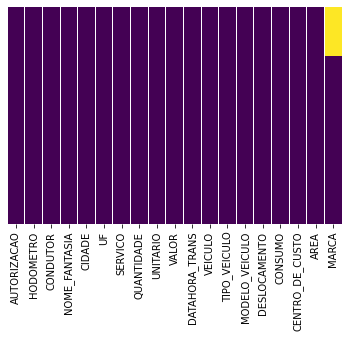

<Figure size 1296x504 with 0 Axes>

In [ ]:
#@title **2. Integrando as bases de dados**
#@markdown Integrando as bases de dados recebidas

#@markdown ---
print('\n>>>>> Renomeando features dos datasets para agrupamento...')
dados_17 = dados_17.rename({'Nº Aut':'AUTORIZAÇÃO','NOME_FANTASIA':'NOME FANTASIA',
                            'DATAHORA TRANSACAO':'DATAHORA TRANS','VEICULO':'VEÍCULO','REGIÃO':'AREA'},
                           axis=1)

dados_18_19_20 = dados_18_19_20.rename({'SEQ CONDUTOR':'CONDUTOR',
                                        'SEQ CENTRO DE CUSTO':'CENTRO DE CUSTO',
                                        'SEQ VEÍCULO':'VEÍCULO','REGIÃO':'AREA'},axis=1)

print('>>>>> Agrupando datasets de serviços...')
dados = pd.concat([dados_17, dados_18_19_20], axis=0)

print('>>>>> dados agrupados...')
print(dados.info())
#Renomeando caracteristicas
print('\n>>>>> Renomeando features...')
dados = dados.rename({'AUTORIZAÇÃO':'AUTORIZACAO','NOME FANTASIA':'NOME_FANTASIA',
                      'SERVIÇO':'SERVICO','DATAHORA TRANS':'DATAHORA_TRANS',
                      'VEÍCULO':'VEICULO','TIPO VEICULO':'TIPO_VEICULO',
                      'MODELO VEICULO':'MODELO_VEICULO','CENTRO DE CUSTO':'CENTRO_DE_CUSTO'}, axis=1)

print('\n>>>>> Analisando Base de Dados Inicial...<<<<<\n')
print('>>>>>Localizados %d instâncias.' % (len(dados)))
print('>>>>>Localizados %d VEÍCULOS na base de dados inicial.' % (dados['VEICULO'].describe().unique()[1]))
print('>>>>>Localizados %d MODELOS VEÍCULO na base de dados inicial.' % (dados['MODELO_VEICULO'].describe().unique()[1]))
print('>>>>>Localizadas %d UFs na base de dados inicial.' % (dados['UF'].describe().unique()[1]))
print('>>>>>Localizados %d SERVIÇOS na base de dados inicial.' % (dados['SERVICO'].describe().unique()[1]))
print('>>>>>Localizadas %d CIDADES na base de dados inicial.' % (dados['CIDADE'].describe().unique()[1]))

print('\n>>>>> Heatmap dos Dados Iniciais <<<<<\n')
htm = sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis' )
plt.figure(figsize=(18,7))
plt.show()

In [ ]:
#@title **3. Pré-processamento dos dados**
#@markdown Pré-processando os dados e agrupando os datasets.

#@markdown ---

#Selecionando caracteristicas principais
print('>>>>> Selecionando features relevantes ao modelo SERVIÇO,UF,MODELO_VEICULO,VEÍCULO,DATAHORA TRANS,CONSUMO,CENTRO DE CUSTO,AREA...')
#dados = dados[['SERVIÇO','UF','CIDADE', 'MODELO_VEICULO', 'VEÍCULO','DATAHORA TRANS','CONSUMO','CENTRO DE CUSTO','AREA']]

#Reclassificando modelos de veículos de maiores frequencia
print('>>>>> Reclassificando os MODELOS DE VEÍCULOS...')
modelo = ['HILUX', 'SPACEFOX', 'SPIN', 'XRE 300', 'S10']
dados.loc[dados['MODELO_VEICULO'].str.contains(modelo[0]), 'MODELO_VEICULO'] = modelo[0]
dados.loc[dados['MODELO_VEICULO'].str.contains(modelo[1]), 'MODELO_VEICULO'] = modelo[1]
dados.loc[dados['MODELO_VEICULO'].str.contains(modelo[2]), 'MODELO_VEICULO'] = modelo[2]
dados.loc[dados['MODELO_VEICULO'].str.contains(modelo[3]), 'MODELO_VEICULO'] = modelo[3]
dados.loc[dados['MODELO_VEICULO'].str.contains(modelo[4]), 'MODELO_VEICULO'] = modelo[4]
dados = dados[dados['MODELO_VEICULO'].isin(modelo)]
#dados.loc[~dados['MODELO_VEICULO'].isin(modelo), 'MODELO_VEICULO'] = modelo[4]

area = ['INTERIOR', 'CAPITAL', 'RMR']
df_anomalias = dados[~dados['AREA'].isin(area)]
print('>>>>> Desconsideradas %d instâncias com classificação de AREA ausente...' % len(dados[~dados['AREA'].isin(area)]))
dados = dados[dados['AREA'].isin(area)]

#Formatando campos
print('>>>>> Formantando CONSUMO...')
if not is_float_dtype(dados['CONSUMO']):
  dados['CONSUMO'] = dados['CONSUMO'].str.replace('.', '').str.replace(',', '.').astype('float64')

df_anomalias = pd.concat((df_anomalias,dados[dados['CENTRO_DE_CUSTO'].isnull()]),axis=0)
print('>>>>> Desconsideradas %d instâncias sem informação de CENTRO DE CUSTO...' % len(dados[dados['CENTRO_DE_CUSTO'].isnull()]))
dados = dados[~dados['CENTRO_DE_CUSTO'].isnull()]

print('>>>>> Formantando CENTRO DE CUSTO...')
if not is_int64_dtype(dados['CENTRO_DE_CUSTO']):
  dados['CENTRO_DE_CUSTO'] = dados['CENTRO_DE_CUSTO'].astype(int)

df_anomalias = pd.concat((df_anomalias,dados[dados['CONSUMO']<=0]),axis=0)
print('>>>>> Desconsideradas %d instâncias com CONSUMO abaixo ou igual a 0...' % len(dados[dados['CONSUMO']<=0]))
dados = dados[dados['CONSUMO']>0]

#Considerando apenas os registros da UF PE
df_anomalias = pd.concat((df_anomalias,dados[dados['UF'] != 'PE']),axis=0)
print('>>>>> Desconsideradas %d instâncias com UF diferente de PE...' % len(dados[dados['UF'] != 'PE']))
dados = dados[dados['UF'] == 'PE']

#Considerando apenas os serviços relacionados a consumo de combustivel
serv_combustivel = ['Gasolina', 'Diesel S10/S50', 'Diesel', 'Diesel S500', 'Etanol', 'Gasolina Aditivada', 'S10/S50']
df_anomalias = pd.concat((df_anomalias,dados[~dados['SERVICO'].isin(serv_combustivel)]),axis=0)
print('>>>>> Desconsideradas %d instâncias de SERVIÇOS diferentes de abastecimento...' % len(dados[~dados['SERVICO'].isin(serv_combustivel)]))
dados = dados[dados['SERVICO'].isin(serv_combustivel)]

#Reclassificando servicos/combustiveis
print('>>>>> Reclassificando COMBUSTIVEL Diesel...')
serv_combustivel = ['Diesel', 'S10/S50', 'Diesel S10/S50', 'Diesel S500']
dados.loc[dados['SERVICO'].str.contains(serv_combustivel[0]), 'SERVICO'] = serv_combustivel[2]
dados.loc[dados['SERVICO'].str.contains(serv_combustivel[1]), 'SERVICO'] = serv_combustivel[2]

print('\n>>>>> Localizado %d registro(s) inválidos de classificação.' % len(df_anomalias))

print(f'\n>>>>> Dados de Serviços Agrupados: {dados.shape[0]} instancias e {dados.shape[1]} colunas identificadas.')

print('\n>>>>> Analisando Base Pré-Processada...<<<<<\n')
print('>>>>>Localizados %d instâncias.' % (len(dados)))
print('>>>>>Localizados %d VEÍCULOS na base de dados.' % (dados['VEICULO'].describe().unique()[1]))
print('>>>>>Localizados %d MODELOS VEÍCULO na base de dados.' % (dados['MODELO_VEICULO'].describe().unique()[1]))
print('>>>>>Localizados %d AREAS na base de dados.' % (dados['AREA'].describe().unique()[1]))
print('>>>>>Localizadas %d UFs na base de dados.' % (dados['UF'].describe().unique()[1]))
print('>>>>>Localizados %d SERVIÇOS na base de dados.' % (dados['SERVICO'].describe().unique()[1]))
print('>>>>>Localizadas %d CIDADES na base de dados.' % (dados['CIDADE'].describe().unique()[1]))


>>>>> Selecionando features relevantes ao modelo SERVIÇO,UF,MODELO_VEICULO,VEÍCULO,DATAHORA TRANS,CONSUMO,CENTRO DE CUSTO,AREA...
>>>>> Reclassificando os MODELOS DE VEÍCULOS...
>>>>> Desconsideradas 191 instâncias com classificação de AREA ausente...
>>>>> Formantando CONSUMO...
>>>>> Desconsideradas 1 instâncias sem informação de CENTRO DE CUSTO...
>>>>> Formantando CENTRO DE CUSTO...
>>>>> Desconsideradas 2877 instâncias com CONSUMO abaixo ou igual a 0...
>>>>> Desconsideradas 74 instâncias com UF diferente de PE...
>>>>> Desconsideradas 61 instâncias de SERVIÇOS diferentes de abastecimento...
>>>>> Reclassificando COMBUSTIVEL Diesel...

>>>>> Localizado 3204 registro(s) inválidos de classificação.

>>>>> Dados de Serviços Agrupados: 698678 instancias e 19 colunas identificadas.

>>>>> Analisando Base Pré-Processada...<<<<<

>>>>>Localizados 698678 instâncias.
>>>>>Localizados 2139 VEÍCULOS na base de dados.
>>>>>Localizados 5 MODELOS VEÍCULO na base de dados.
>>>>>Localizados 3 ARE

Identificando valores ausentes.

>>>>> Heatmap do dataset <<<<<



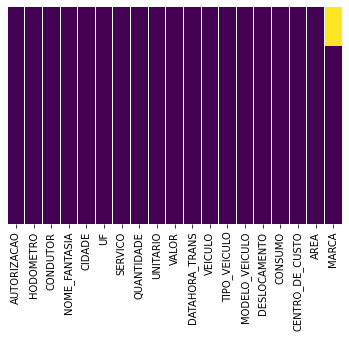

<Figure size 1296x504 with 0 Axes>

>>>>> Histograma de Consumo <<<<<



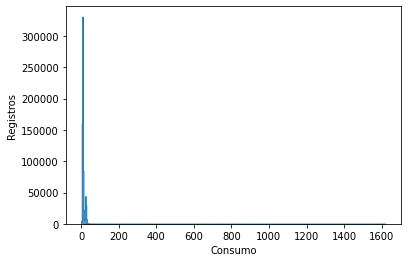

<Figure size 1296x504 with 0 Axes>


>>>>> Histograma de Modelos de Veículos <<<<<



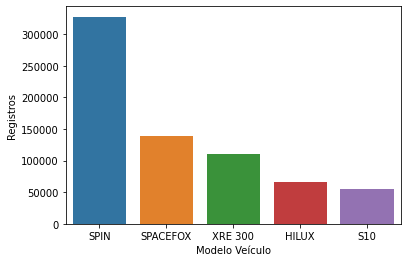

<Figure size 1296x504 with 0 Axes>


>>>>> Boxplot de Modelos de Veículos <<<<<



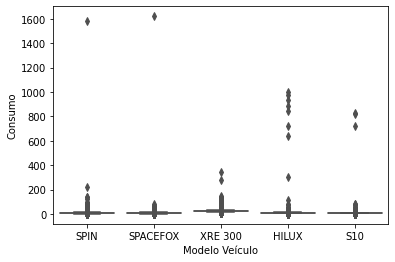

<Figure size 1296x504 with 0 Axes>


>>>>> Boxplot de Modelos de Veículos e Area<<<<<



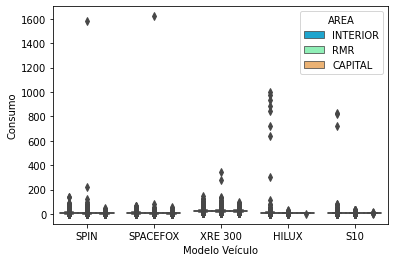

<Figure size 1296x504 with 0 Axes>

Descrevendo caracteristicas dos dados.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698678 entries, 15 to 698107
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AUTORIZACAO      698678 non-null  int64  
 1   HODOMETRO        698678 non-null  float64
 2   CONDUTOR         698678 non-null  int64  
 3   NOME_FANTASIA    698678 non-null  object 
 4   CIDADE           698678 non-null  object 
 5   UF               698678 non-null  object 
 6   SERVICO          698678 non-null  object 
 7   QUANTIDADE       698678 non-null  object 
 8   UNITARIO         698678 non-null  object 
 9   VALOR            698678 non-null  object 
 10  DATAHORA_TRANS   698678 non-null  object 
 11  VEICULO          698678 non-null  float64
 12  TIPO_VEICULO     698678 non-null  object 
 13  MODELO_VEICULO   698678 non-null  object 
 14  DESLOCAMENTO     698678 non-null  int64  
 15  CONSUMO          698678 non-null  float64
 1

FA        FR    LI       LS      MEDIA  MEDIANA
MODELO_VEICULO AREA                                                         
HILUX          CAPITAL       45  0.110146  3.47    11.29   9.078889     9.33
               INTERIOR   60496  0.110511  1.61  1002.00   9.048865     8.85
               RMR         5082  0.112208  0.83    30.80   8.912009     8.88
S10            CAPITAL      317  0.128031  2.98    12.69   7.810631     7.72
               INTERIOR   42956  0.118223  0.74   825.00   8.458573     8.38
               RMR        12145  0.122605  0.94    34.94   8.156278     8.06
SPACEFOX       CAPITAL    17671  0.153323  2.37    60.57   6.522183     6.41
               INTERIOR   56249  0.123798  2.02    66.80   8.077663     7.91
               RMR        64998  0.131596  2.08  1620.00   7.599032     7.35
SPIN           CAPITAL    47101  0.157236  0.65    51.40   6.359849     6.28
               INTERIOR  148168  0.122274  1.92   139.93   8.178350     8.03
               RMR       132578  0.132759  0.81  1581.49   7.532458     7.27
XRE 300        CAPITAL    11974  0.043888  8.01    96.82  22.785342    22.80
               INTERIOR   44563  0.043404  8.34   151.13  23.039235    22.90
               RMR        54335  0.041422  7.28   342.17  24.141751    24.13

In [ ]:
#@title **4. Analisando os Dados Pré-Processados**
#@markdown Visualizando informações gráficas. Informações ausentes e tipos de objetos e caracteristicas dos dados.

#@markdown ---
#Checando valores nulos nos dados
print('Identificando valores ausentes.\n')

################################################################################
# Análises Gráficas
################################################################################
print('>>>>> Heatmap do dataset <<<<<\n')
htm = sns.heatmap(dados.isnull(), yticklabels=False, cbar=False, cmap='viridis' )
plt.figure(figsize=(18,7))
plt.show()

print('>>>>> Histograma de Consumo <<<<<\n')
hc = sns.histplot(data=dados, x='CONSUMO', element='step', binwidth=3)
hc.set(xlabel='Consumo', ylabel='Registros')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Histograma de Modelos de Veículos <<<<<\n')
hmv = sns.countplot(x='MODELO_VEICULO', data=dados, order = dados['MODELO_VEICULO'].value_counts().index)
hmv.set(xlabel='Modelo Veículo', ylabel='Registros')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Boxplot de Modelos de Veículos <<<<<\n')
bmv = sns.boxplot(x='MODELO_VEICULO', y='CONSUMO', data=dados, palette='rainbow', order = dados['MODELO_VEICULO'].value_counts().index)
bmv.set(xlabel='Modelo Veículo', ylabel='Consumo')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Boxplot de Modelos de Veículos e Area<<<<<\n')
bmv = sns.boxplot(x='MODELO_VEICULO', y='CONSUMO', hue='AREA',data=dados, palette='rainbow', order = dados['MODELO_VEICULO'].value_counts().index)
bmv.set(xlabel='Modelo Veículo', ylabel='Consumo')
plt.figure(figsize=(18,7))
plt.show()


#Checando tipos das colunas
print('Descrevendo caracteristicas dos dados.\n')
dados.info()

df_analise = dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).count()
df_analise = df_analise.rename({'CONSUMO':'FA'},axis=1)
df_analise = pd.concat([df_analise,(dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).count()/dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).sum())],axis=1)
df_analise = df_analise.rename({'CONSUMO':'FR'},axis=1)
df_analise = pd.concat([df_analise,dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).min()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'LI'},axis=1)
df_analise = pd.concat([df_analise,dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).max()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'LS'},axis=1)
df_analise = pd.concat([df_analise,dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).mean()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'MEDIA'},axis=1)
df_analise = pd.concat([df_analise,dados[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).median()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'MEDIANA'},axis=1)
df_analise.head(15)

In [ ]:
#@title **5. Pré-Processamento avançado dos Dados**
#@markdown Aplicando métodos.
#processa_consumo = "Sim" #@param ["Sim", "Nao"] {allow-input: true}
processa_rotulo = "Sim" #@param ["Sim", "Nao"] {allow-input: true}
processa_data = "Sim" #@param ["Sim", "Nao"] {allow-input: true}
percentual_consumo = 30  #@param {type: "slider", min: 15, max: 30}
percentual_outlier = 50  #@param {type: "slider", min: 40, max: 60}
#@markdown ---
################################################################################
# Função: Formatar datas registradas
################################################################################
def formatarData(cols):
  global i, j;
  cols[0] = cols[0].replace('-', '/')
  cols[0] = cols[0].split()[0]
  aux = cols[0].split('/')
  
  if int(aux[0]) > 31:
    daux = aux[2]
    aux[2] = aux[0]  
    aux[0] = daux
    j += 1

  if int(aux[2]) < 2000: 
    i += 1
    aux[2] = '20'+aux[2]
    
  aux = aux[0]+'/'+aux[1]+'/'+aux[2]
  return aux

################################################################################
# Função: Calculo do consumo médio da classe entre o MIN e MAX
################################################################################

#def consumoMedio(cols):
#  global i, j, k;
#  if cols[1] < df_consumo['LIF'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0] or (cols[1] > df_consumo['LSF'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]):
#    k += 1
#    return 2
#  if cols[1] < df_consumo['LI'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0] or (cols[1] > df_consumo['LS'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]):
#    j += 1
#    return 1
    #return df_consumo['CONSUMO'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]
#  else:
#    i += 1
#    return 0
    #return cols[1]

def consumoMedio(cols):
  global i, j, k;
  if cols[1] >= df_consumo['LI'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0] and (cols[1] <= df_consumo['LS'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]):
    i += 1
    return 0 
  if cols[1] < df_consumo['LIF'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0] or (cols[1] > df_consumo['LSF'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]):
    return 3
  if cols[1] < df_consumo['LI'][(df_consumo['MODELO_VEICULO']==cols[0]) & (df_consumo['AREA']==cols[2])].iloc[0]:
    j += 1
    return 1
  else:
    k += 1
    return 2

################################################################################
# Função: ROTULAR base de dados
################################################################################

#def rotularInstancia(cols):
#  if cols[0] != cols[1]:
#    return 1
#  else:
#    return 0

################################################################################
# Pré-Processamento dos dados
################################################################################
#modelo_veiculo = 'HILUX'
#Seleção do banco de dados
#df_final = dados[dados.MODELO_VEICULO == modelo_veiculo]
df_final = dados
df_final['ROTULO'] = ''

print('>>>>> Iniciado criação do dataset de consumo teórico para os modelos de veículos...\n')
df_consumo = pd.DataFrame()
df_consumo = df_final[['MODELO_VEICULO', 'AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).median()
df_consumo['LI'] = df_consumo['CONSUMO']-df_consumo['CONSUMO']*percentual_consumo/100
df_consumo['LS'] = df_consumo['CONSUMO']+df_consumo['CONSUMO']*percentual_consumo/100
df_consumo['LIF'] = df_consumo['CONSUMO']-df_consumo['CONSUMO']*percentual_outlier/100
df_consumo['LSF'] = df_consumo['CONSUMO']+df_consumo['CONSUMO']*percentual_outlier/100
df_consumo = df_consumo.reset_index()
print(df_consumo)
print('\n>>>>> Criado dataset de consumo teórico para os modelos de veículos...\n')

#Retirando outliers e consumo fora da realidade
if processa_rotulo=='Sim':
  print('>>>>> Iniciado Rotulação...')
  i = j = k = 0
  df_final[['ROTULO']] = df_final[['MODELO_VEICULO','CONSUMO','AREA']].apply(consumoMedio, axis=1)
  #df_final[['CONSUMO_MEDIO']] = df_final[['MODELO_VEICULO','CONSUMO','AREA']].apply(consumoMedio, axis=1)
  print('>>>>> ROTULOS processados %d, ROTULO 0: %d ROTULO 1: %d ROTULO 2: %d...' % (len(df_final), i,j,k))
#  if processa_rotulo=='Sim':
#    #Rotulando Base de Dados
#    print('>>>>> Iniciado ROTULOS da base de dados...')
#    df_final[['ROTULO']] = df_final[['CONSUMO','CONSUMO_MEDIO']].apply(rotularInstancia, axis=1)
#    print('>>>>> Rotulação concluída...')

#Formatando datas
if processa_data=='Sim':
  print('\n>>>>> Iniciado revisão e formatação da DATAHORA TRANS...')
  i = j = 0
  df_final['DATAHORA_TRANS'] = df_final[['DATAHORA_TRANS']].apply(formatarData, axis=1)
  print('>>>>> DATAS processadas %d, DATAS alteradas %d e formatadas %d...\n' % (len(df_final), i, j))

print('>>>>> Salvando dataset pré-processado no driver...')
df_final.to_csv("/content/drive/Shareddrives/Projeto SAA MD 2021.1/dados/11052021consumo_pre_processado_2021-1.csv",sep=";")

print('>>>>> Concluído Pré-processamento. Registros finais %d.' % (len(df_final)))

print('\n>>>>> Analisando Base de Pré-Processada...<<<<<\n')
print('>>>>>Localizados %d instâncias.' % (len(df_final)))
print('>>>>>Localizados %d VEÍCULOS na base de dados.' % (df_final['VEICULO'].describe().unique()[1]))
print('>>>>>Localizados %d MODELOS VEÍCULO na base de dados.' % (df_final['MODELO_VEICULO'].describe().unique()[1]))
print('>>>>>Localizados %d AREAS na base de dados.' % (df_final['AREA'].describe().unique()[1]))
print('>>>>>Localizadas %d UFs na base de dados.' % (df_final['UF'].describe().unique()[1]))
print('>>>>>Localizados %d SERVIÇOS na base de dados.' % (df_final['SERVICO'].describe().unique()[1]))
print('>>>>>Localizadas %d CIDADES na base de dados.' % (df_final['CIDADE'].describe().unique()[1]))


>>>>> Iniciado criação do dataset de consumo teórico para os modelos de veículos...

   MODELO_VEICULO      AREA  CONSUMO      LI      LS     LIF     LSF
0           HILUX   CAPITAL     9.33   6.531  12.129   4.665  13.995
1           HILUX  INTERIOR     8.85   6.195  11.505   4.425  13.275
2           HILUX       RMR     8.88   6.216  11.544   4.440  13.320
3             S10   CAPITAL     7.72   5.404  10.036   3.860  11.580
4             S10  INTERIOR     8.38   5.866  10.894   4.190  12.570
5             S10       RMR     8.06   5.642  10.478   4.030  12.090
6        SPACEFOX   CAPITAL     6.41   4.487   8.333   3.205   9.615
7        SPACEFOX  INTERIOR     7.91   5.537  10.283   3.955  11.865
8        SPACEFOX       RMR     7.35   5.145   9.555   3.675  11.025
9            SPIN   CAPITAL     6.28   4.396   8.164   3.140   9.420
10           SPIN  INTERIOR     8.03   5.621  10.439   4.015  12.045
11           SPIN       RMR     7.27   5.089   9.451   3.635  10.905
12        XRE 300 

>>>>> Heatmap do dataset <<<<<



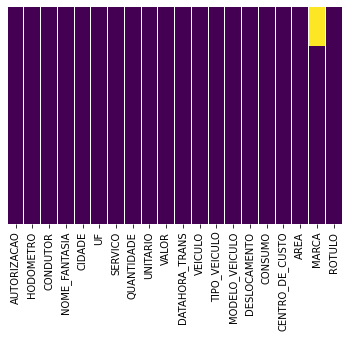

<Figure size 1296x504 with 0 Axes>

>>>>> Histograma de Consumo <<<<<



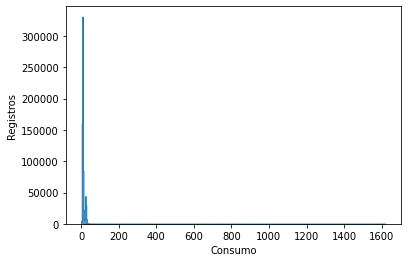

<Figure size 1296x504 with 0 Axes>


>>>>> Histograma de Modelos de Veículos <<<<<



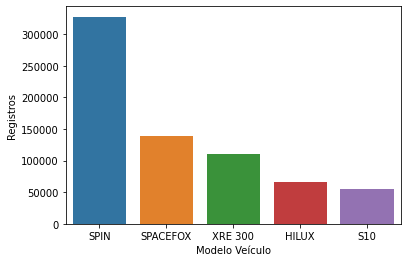

<Figure size 1296x504 with 0 Axes>


>>>>> Boxplot de Modelos de Veículos <<<<<



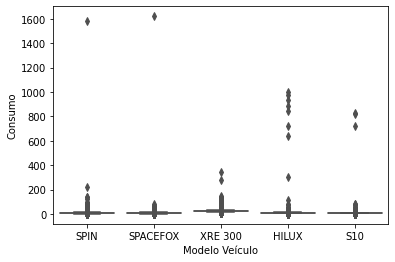

<Figure size 1296x504 with 0 Axes>


>>>>> Boxplot de Modelos de Veículos e Area<<<<<



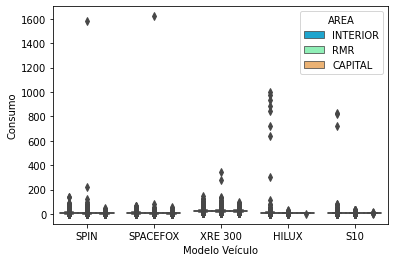

<Figure size 1296x504 with 0 Axes>

FA        FR    LI       LS      MEDIA  MEDIANA
MODELO_VEICULO AREA                                                         
HILUX          CAPITAL       45  0.110146  3.47    11.29   9.078889     9.33
               INTERIOR   60496  0.110511  1.61  1002.00   9.048865     8.85
               RMR         5082  0.112208  0.83    30.80   8.912009     8.88
S10            CAPITAL      317  0.128031  2.98    12.69   7.810631     7.72
               INTERIOR   42956  0.118223  0.74   825.00   8.458573     8.38
               RMR        12145  0.122605  0.94    34.94   8.156278     8.06
SPACEFOX       CAPITAL    17671  0.153323  2.37    60.57   6.522183     6.41
               INTERIOR   56249  0.123798  2.02    66.80   8.077663     7.91
               RMR        64998  0.131596  2.08  1620.00   7.599032     7.35
SPIN           CAPITAL    47101  0.157236  0.65    51.40   6.359849     6.28
               INTERIOR  148168  0.122274  1.92   139.93   8.178350     8.03
               RMR       132578  0.132759  0.81  1581.49   7.532458     7.27
XRE 300        CAPITAL    11974  0.043888  8.01    96.82  22.785342    22.80
               INTERIOR   44563  0.043404  8.34   151.13  23.039235    22.90
               RMR        54335  0.041422  7.28   342.17  24.141751    24.13

In [ ]:
#@title **6. Analisando Graficamente os Dados Pré-Processados**
#@markdown Análise dos dados após o pré-processamento.

#@markdown ---
################################################################################
# Análises Gráficas
################################################################################
print('>>>>> Heatmap do dataset <<<<<\n')
htm = sns.heatmap(df_final.isnull(), yticklabels=False, cbar=False, cmap='viridis' )
plt.figure(figsize=(18,7))
plt.show()

print('>>>>> Histograma de Consumo <<<<<\n')
hc = sns.histplot(data=df_final, x='CONSUMO', element='step', binwidth=3)
hc.set(xlabel='Consumo', ylabel='Registros')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Histograma de Modelos de Veículos <<<<<\n')
hmv = sns.countplot(x='MODELO_VEICULO', data=df_final, order = df_final['MODELO_VEICULO'].value_counts().index)
hmv.set(xlabel='Modelo Veículo', ylabel='Registros')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Boxplot de Modelos de Veículos <<<<<\n')
bmv = sns.boxplot(x='MODELO_VEICULO', y='CONSUMO', data=df_final, palette='rainbow', order = df_final['MODELO_VEICULO'].value_counts().index)
bmv.set(xlabel='Modelo Veículo', ylabel='Consumo')
plt.figure(figsize=(18,7))
plt.show()

print('\n>>>>> Boxplot de Modelos de Veículos e Area<<<<<\n')
bmv = sns.boxplot(x='MODELO_VEICULO', y='CONSUMO', hue='AREA', data=df_final, palette='rainbow', order = df_final['MODELO_VEICULO'].value_counts().index)
bmv.set(xlabel='Modelo Veículo', ylabel='Consumo')
plt.figure(figsize=(18,7))
plt.show()

df_analise = df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).count()
df_analise = df_analise.rename({'CONSUMO':'FA'},axis=1)
df_analise = pd.concat([df_analise,(df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).count()/df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).sum())],axis=1)
df_analise = df_analise.rename({'CONSUMO':'FR'},axis=1)
df_analise = pd.concat([df_analise,df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).min()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'LI'},axis=1)
df_analise = pd.concat([df_analise,df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).max()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'LS'},axis=1)
df_analise = pd.concat([df_analise,df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).mean()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'MEDIA'},axis=1)
df_analise = pd.concat([df_analise,df_final[['MODELO_VEICULO','AREA','CONSUMO']].groupby(['MODELO_VEICULO','AREA']).median()],axis=1)
df_analise = df_analise.rename({'CONSUMO':'MEDIANA'},axis=1)
df_analise.head(15)